In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
pd.set_option('display.max_columns', None)

In [78]:
df = pd.read_csv('Datasets/IPL IMB381IPL2013.csv')

In [79]:
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

There are 130 observations (records) and 26 columns (features) in the data, and there are no missing
values.

#### We can build a model to understand what features of players are influencing their SOLD PRICE or predict the player’s auction prices in future. However, all columns are not features. For example, Sl. NO. is just a serial number and cannot be considered a feature of the player.

In [81]:
df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [82]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S','ODI-SR-B', 
              'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 
              'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

### Encoding Categorical Variables

In [83]:
df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [84]:
pd.get_dummies(df['PLAYING ROLE'], dtype='int').head()

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


We must create dummy variables for all categorical variables present in the dataset.

In [85]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']
encoded_df = pd.get_dummies(df[X_features], columns=categorical_features, drop_first=True, dtype='int')

In [86]:
encoded_df.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,AGE_3,COUNTRY_BAN,COUNTRY_ENG,COUNTRY_IND,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [87]:
encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [88]:
X_features = encoded_df.columns

In [89]:
# Splitting the Dataset into Training and Test Sets
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = sm.add_constant(encoded_df)
y = df['SOLD PRICE']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Building the model on the Training Set
model1 = sm.OLS(y_train, X_train).fit()
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2025-10-07 22:39        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7997  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1773   86671.0156
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4196  752467.3803
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5171 1147625.0136
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6303  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9281  540068.7522
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6564
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7527  368875.0587
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9304  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6298  654891.6711
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1845  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0279  354416.7719
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0773  410167.8717
----------------------------------------------------------------

#### As per the p-value (< 0.05), only the features HS, AVE, AGE_2, COUNTRY_ENG have come out significant. The model says that none of the other features are influencing SOLD PRICE. This is not very intuitive and could be a result of multi-collinearity effect of variables.

### Handling Multi-Collinearity
#### 1. Variance Inflation Factor (VIF)
#### 2. Checking correlation of columns using Large VIFs
#### 3. Building new model after removing Multi-Collinearity

In [92]:
# 1. Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_factors(X):
    X_matrix = X.values
    vif = [variance_inflation_factor(X_matrix, i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [93]:
vif_factors = get_vif_factors(X[X_features])
vif_factors

,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [94]:
# 2. Checking Correlation of Columns using Large VIFs
cols_large_vif = vif_factors[vif_factors['VIF'] > 4].column

Text(0.5, 1.0, 'Heatmap depicting Correlation between features')

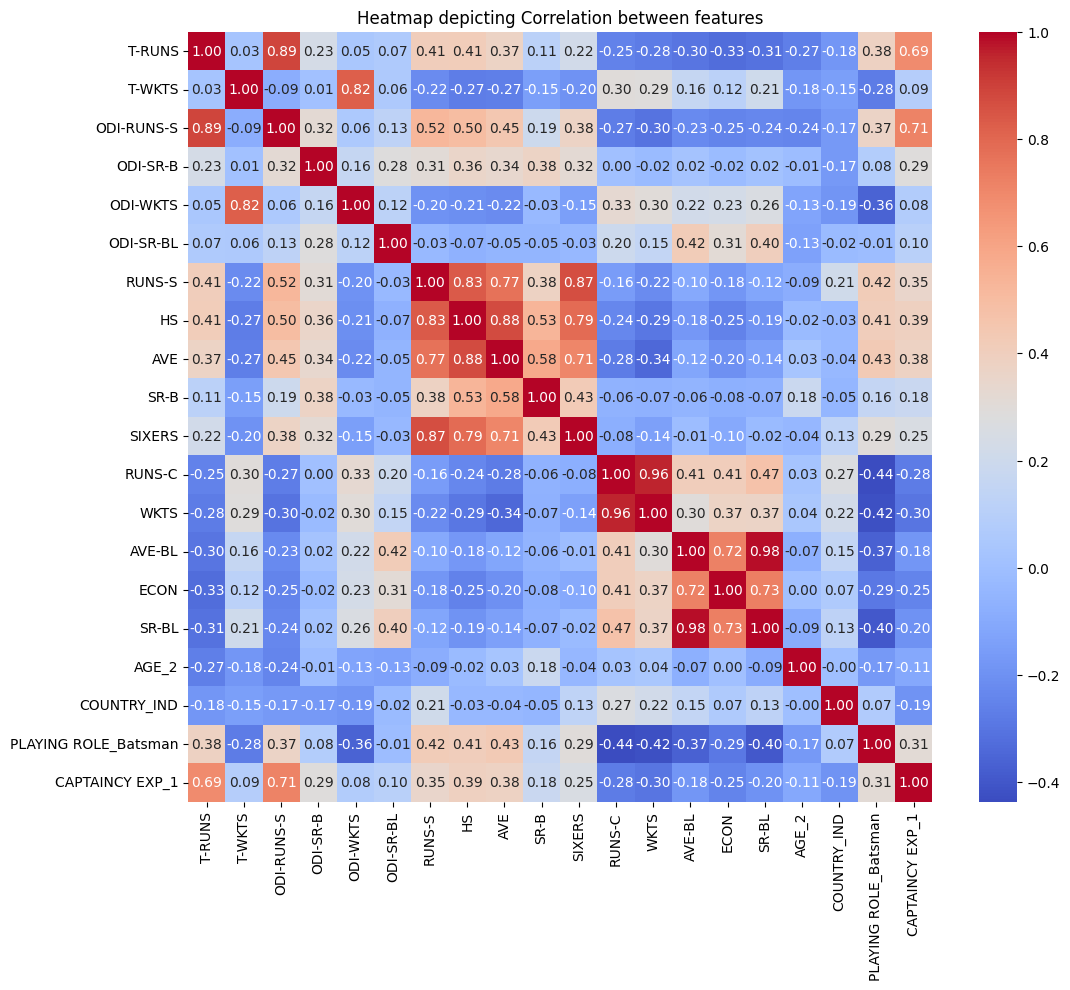

In [95]:
plt.figure(figsize=(12, 10))
sns.heatmap(X[cols_large_vif].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap depicting Correlation between features')

#### The following observations are made from the heatmap:
- T-RUNS and ODI-RUNS-S are highly correlated, whereas ODI-WKTS and T-WKTS are highly
correlated.
- Batsman features like RUNS-S, HS, AVE, SIXERS are highly correlated, while bowler’s features
like AVE-BL, ECON and SR-BL are highly correlated.

### To avoid multi-collinearity, we can keep only one column from each group of highly correlated variables and remove the others. Now which one to keep and which one to remove depends on the understanding of the data and the domain.

In [96]:
columns_to_remove = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 'AVE', 'RUNS-C',
					'SR-B', 'AVE-BL', 'ECON', 'ODI-SR-B', 'ODI-RUNS-S',
					'AGE_2', 'SR-BL']
										
X_new_features = list(set(X_features) - set(columns_to_remove))
get_vif_factors(X[X_new_features])

,column,VIF
0,COUNTRY_ENG,1.131869
1,COUNTRY_NZ,1.173418
2,PLAYING ROLE_Batsman,2.680207
3,COUNTRY_PAK,1.334773
4,COUNTRY_SL,1.519752
5,COUNTRY_IND,3.144668
6,COUNTRY_ZIM,1.205305
7,SIXERS,2.397409
8,ODI-WKTS,2.742889
9,PLAYING ROLE_W. Keeper,1.900941


The VIFs on the final set of variables indicate that there is no multi-collinearity present any more
(VIF values are less than 4). We can proceed to build the model with these set of variables now.

In [97]:
# 3. Building the model again after removing multi-collinear features
X_train = X_train[X_new_features]

model2 = sm.OLS(y_train, X_train).fit()
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2025-10-07 22:39   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6542  440086.1502
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5007  709026.1445
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7281  282672.8801
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6314  403448.7600
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2454
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the                 model does
not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[3] The condition number is large, 1.49e+03. This might indicate                that
there are strong multicollinearity or other numerical                problems.
"""

The p-values of the coefficients estimated show whether the variables are statistically signifi-
cant in influencing response variables or not. If the p-value is less than the significance value (a) then the feature is statistically significant, otherwise it is not. The value of a is usually selected as 0.05; however, it may be chosen based on the context of the problem.

Based on the p-values, only the variables COUNTRY_IND, COUNTRY_ENG, SIXERS, CAPTAINCY
EXP_1 have come out statistically significant. So, the features that decide the SOLD PRICE are:
- Whether the players belong to India or England (that is, origin country of the player).
- How many sixes has the player hit in previous versions of the IPL? How many wickets have been taken by the player in ODIs?
- Whether the player has any previous captaincy experience or not?

In [98]:
significant_vars = ['COUNTRY_ENG', 'CAPTAINCY EXP_1', 'COUNTRY_IND', 'SIXERS']

X_train = X_train[significant_vars]

model3 = sm.OLS(y_train, X_train).fit()
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2025-10-07 22:39 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

The following inference can be derived from the latest model model3:
- All the variables are statistically significant, as p-value is less than 0.05.
- The overall model is significant as the p-value for the F-statistics is also less than 5%.
- The model can explain 71.5% of variance in SOLD PRICE as the R-Squared value is 0.715 and the Adjusted R-Squared value is 0.704 i.e. 70.4%. Adjusted R-squared is a measure that is calculated after
normalizing SSE and SST with the corresponding degrees of freedom.

### Residual Analysis in Multiple Linear Regression
#### 1. Test for Normality of Residuals (P-P Plot)
#### 2. Residual Plot for Homoscedasticity and Model Specification

In [99]:
# 1. Test for Normality of Residuals (P-P Plot)
def draw_pp_plot(model, title):
    probplot = sm.ProbPlot(model.resid, fit=True)
    plt.figure(figsize=(8, 6))
    probplot.ppplot(line='45')
    plt.title(title)
    plt.show()

<Figure size 800x600 with 0 Axes>

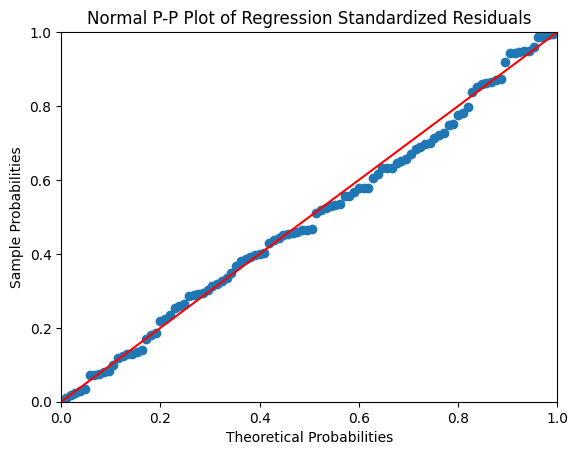

In [100]:
draw_pp_plot(model3, 'Normal P-P Plot of Regression Standardized Residuals')

The P-P Plot shown above shows that the residuals follow an approximate normal distribution.

In [101]:
# 2. Residual Plot for Homoscedasticity and Model Specification
# The residual plot is a plot between standardized fitted values and residuals. 
# The residuals should not have any patterns. Residual plot with shape such as a funnel may 
# indicate existence of heteroscedasticity. Any pattern in the residual plot may also 
# indicate the use of incorrect functional form in the regression model development.
def get_standardized_values(vals):
	return (vals - vals.mean())/vals.std()

def plot_resid_fitted(fitted, resid, title):
    plt.scatter(get_standardized_values(fitted), get_standardized_values(resid))
    plt.title(title)
    plt.xlabel("Standardized predicted values")
    plt.ylabel("Standardized residual values")
    plt.show()

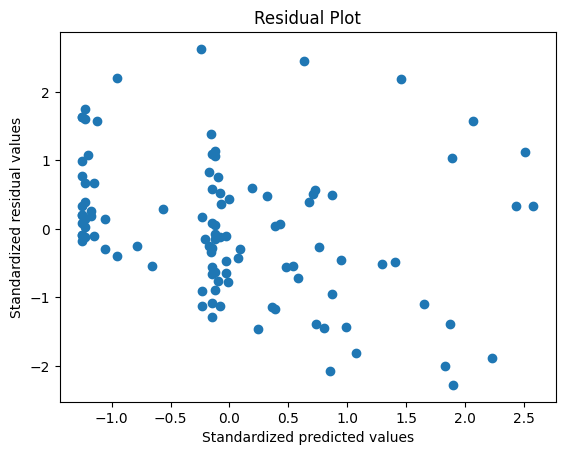

In [102]:
plot_resid_fitted(model3.fittedvalues, model3.resid, 'Residual Plot')

The residuals in above figure do not show any signs of hetroscedasticity.

### Detecting Outliers
In OLS estimate, we assume that each record in the data has equal influence on the model parameters, which may not be true. We can use the function influence_plot() to identify highly influential observations. Leverage values of more than 3(K + 1)/n are treated as highly influential observations.

In [103]:
k = X_train.shape[1]
n = X_train.shape[0]

In [104]:
print(f"Number of Observations: {n}, and number of variables: {k}")

Number of Observations: 104, and number of variables: 4


In [105]:
leverage_cutoff = 3 * ((k + 1) / n)
print(f"Cutoff for Leverage values: {round(leverage_cutoff, 3)}")

Cutoff for Leverage values: 0.144


The observations with leverge values more than 0.178 are highly influential.

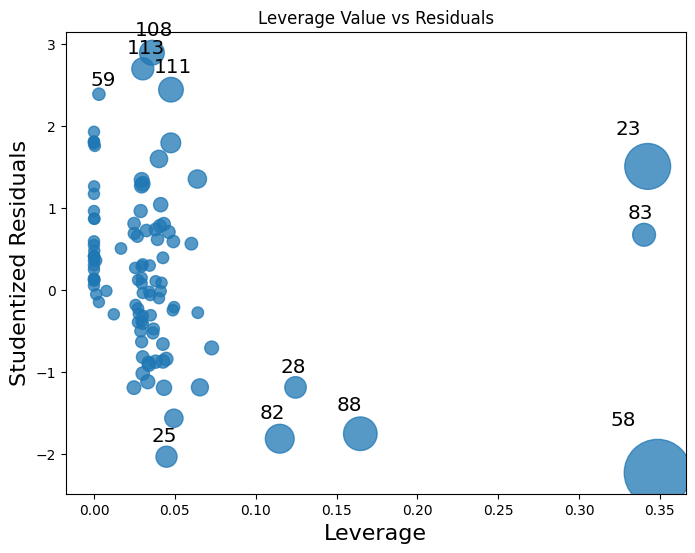

In [106]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize=(8, 6))
influence_plot(model3, ax=ax)
plt.title("Leverage Value vs Residuals")
plt.show()

The above diagram shows there are three observations 23, 58, 83 that have comparatively high leverage
with residuals. We can filter out the influential observations.

In [107]:
df[df.index.isin([23, 58, 83])]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,169,33.2,1,62,24,31.00,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,13,63.2,0,74,27,8.22,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,7,57.1,1,634,103,42.27,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


These observations do not have large residuals. So, it may not be necessary to remove these observations. But if the observations need to be removed, the following method drop() can be used:

In [108]:
new_X_train = X_train.drop([23, 58, 83], axis=0)
new_y_train = y_train.drop([23, 58, 83], axis=0)

In [109]:
# Transforming Responsive Variable
y_train_sqrt = np.sqrt(y_train)

model4 = sm.OLS(y_train_sqrt, X_train).fit()
model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2025-10-07 22:39 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

<Figure size 800x600 with 0 Axes>

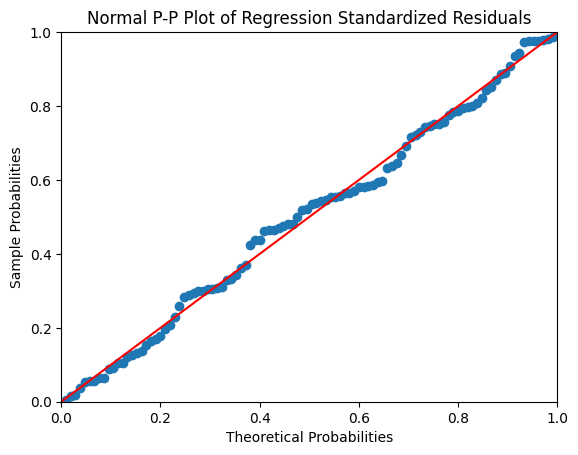

In [110]:
draw_pp_plot(model4, 'Normal P-P Plot of Regression Standardized Residuals')

In the above table, the R-Squared value of the model has increased to 0.751. The P-P Plot shown above shows that the residuals follow a normal distribution.

In [111]:
# Making Predictions on the Validation Set
y_pred = np.power(model4.predict(X_test[X_train.columns]), 2)

In [112]:
# 1. Measuring RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(496151.18122558383)